# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel("/Users/alex/Desktop/Columbia/Foundations/class-06/06-classwork/dogs/NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

In [3]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [4]:
print(df.shape)
df.dtypes

(81937, 15)


Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [5]:
df = pd.read_excel("/Users/alex/Desktop/Columbia/Foundations/class-06/06-classwork/dogs/NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx",skip_footer=51937)

In [6]:
print(df.shape)

(30000, 15)


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [7]:
#Each row describes a dog. "Primary Breed" is the breed of the dog. "Vaccinated" shows as "Yes" or "No" showing if the dog is vaccinated

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

In [8]:
#In which ZIP code lives the most dogs
#What is the favorite breed in each ZIP code
#Which breeds have which colors?
#Which breeds are guard dogs or trained?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

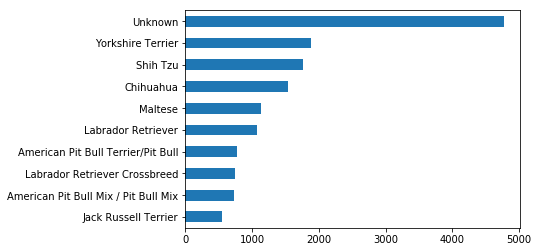

In [9]:
df['Primary Breed'].value_counts().head(10).sort_values().plot(kind="barh")

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

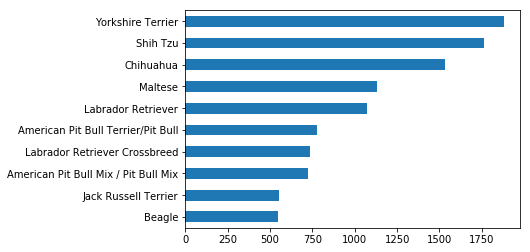

In [10]:
df[~(df["Primary Breed"]=="Unknown")]["Primary Breed"].value_counts().head(10).sort_values().plot(kind="barh")

## What are the most popular dog names?

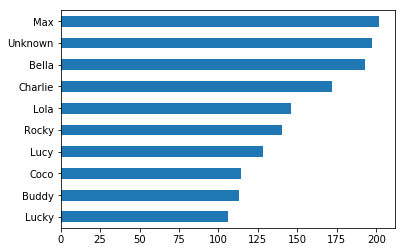

In [11]:
df[~(df["Animal Name"]=="UNKNOWN")]["Animal Name"].value_counts().head(10).sort_values().plot(kind="barh")

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
print(df[(df["Animal Name"]=="Alexander")]["Animal Name"].value_counts())
print(df[(df["Animal Name"]=="Max")]["Animal Name"].value_counts())
print(df[(df["Animal Name"]=="Maxwell")]["Animal Name"].value_counts().astype(int))

Alexander    2
Name: Animal Name, dtype: int64
Max    202
Name: Animal Name, dtype: int64
Maxwell    11
Name: Animal Name, dtype: int64


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [13]:
round(len(df[df["Guard or Trained"] == "Yes"]) / len(df) * 100,2)

0.06

## What are the actual numbers?

In [14]:
print("Total number:", len(df))
print("Guard dogs:", len(df[df["Guard or Trained"] == "Yes"]))
print("Not guard dogs:", len(df[df["Guard or Trained"] == "No"]))

Total number: 30000
Guard dogs: 17
Not guard dogs: 19809


## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [15]:
df["Guard or Trained"].value_counts(dropna=False)

No     19809
NaN    10174
Yes       17
Name: Guard or Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [16]:
df["Guard or Trained"]=df["Guard or Trained"].replace(np.nan,"No")

In [17]:
df["Guard or Trained"].value_counts(dropna=False)

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

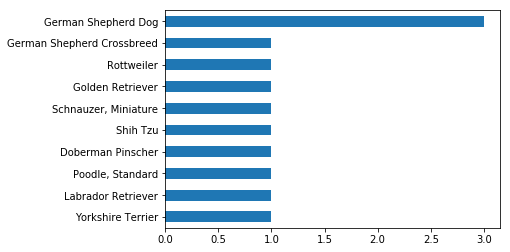

In [18]:
df[(df["Guard or Trained"]=="Yes") & (df["Primary Breed"]!="Unknown")]["Primary Breed"].value_counts().sort_values().plot(kind="barh")

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [19]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df['year'].head(5)

0    2007
1    2013
2    2014
3    2008
4    2014
Name: year, dtype: int64

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [20]:
df['age']=dt.date.today().year-df['year']
df['age'].head(5)

0    10
1     4
2     3
3     9
4     3
Name: age, dtype: int64

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [21]:
df_neighborhoods = pd.read_csv('/Users/alex/Desktop/Columbia/Foundations/class-06/06-classwork/dogs/zipcodes-neighborhoods.csv')
df_merged = df
df_merged = df_merged.merge(df_neighborhoods, left_on = 'Owner Zip Code', right_on = "zip", how = "outer")

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [22]:
df_merged[(df_merged["borough"]=='Bronx') & (df_merged['Primary Breed']!='Unknown')]['Primary Breed'].value_counts().head(5)

Yorkshire Terrier                     250
Shih Tzu                              244
Chihuahua                             208
American Pit Bull Terrier/Pit Bull    181
Maltese                               139
Name: Primary Breed, dtype: int64

In [23]:
df_merged[(df_merged["borough"]=='Brooklyn') & (df_merged['Primary Breed']!='Unknown')]['Primary Breed'].value_counts().head(5)

Yorkshire Terrier     501
Shih Tzu              481
Chihuahua             391
Labrador Retriever    255
Maltese               247
Name: Primary Breed, dtype: int64

In [24]:
df_merged[(df_merged["neighborhood"]=='Upper East Side') & (df_merged['Primary Breed']!='Unknown')]['Primary Breed'].value_counts().head(5)

Havanese              94
Shih Tzu              83
Labrador Retriever    77
Maltese               73
Yorkshire Terrier     68
Name: Primary Breed, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [25]:
df_merged[df_merged['Primary Breed']!='Unknown'].groupby('borough')['Primary Breed'].value_counts().groupby(level=0).nlargest(1)

borough        borough        Primary Breed    
Bronx          Bronx          Yorkshire Terrier    250
Brooklyn       Brooklyn       Yorkshire Terrier    501
Manhattan      Manhattan      Chihuahua            511
Queens         Queens         Yorkshire Terrier    434
Staten Island  Staten Island  Yorkshire Terrier    171
Name: Primary Breed, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [52]:
count_dogs = df_merged[df_merged['Primary Breed']!='Unknown']['Primary Breed'].value_counts()
not_vaccinated = df_merged[df_merged['Spayed or Neut']=='No']['Primary Breed'].value_counts()
(not_vaccinated/count_dogs*100).sort_values(ascending=False).head(20)

Polish Hound                           100.000000
Treeing Tennessee Brindle              100.000000
Mudi                                   100.000000
Mastiff, Tibetan                       100.000000
Borzoi                                 100.000000
Canaan Dog                             100.000000
Mastiff, French (Dogue de Bordeaux)    100.000000
Dogo Argentino                         100.000000
Kooikerhondje                          100.000000
Karelian Bear Dog                      100.000000
Fila Brasileiro                        100.000000
French Spaniel                         100.000000
Lagotto Romagnolo                       66.666667
Greater Swiss Mountain Dog              66.666667
American Bully                          64.705882
Morkie                                  60.606061
Affenpinscher                           60.000000
Miniature American Shepherd             57.142857
Maltipoo                                53.846154
Shih Tzu Crossbreed                     51.968504


In [27]:
df_merged[df_merged['Animal Gender'] != 'Unknown'].groupby('Animal Gender')['Spayed or Neut']\
.value_counts(normalize=True,dropna=True)

Animal Gender  Spayed or Neut
               Yes               1.000000
F              Yes               0.857850
               No                0.142150
M              Yes               0.791856
               No                0.208144
Name: Spayed or Neut, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [28]:
monochrome_True = df_merged['Animal Dominant Color'].str.lower().isin(['black','white','grey'])\
& df_merged['Animal Secondary Color'].isnull() & df_merged['Animal Third Color'].isnull()
df_merged['monochrome'] = monochrome_True
number_monochrome = len(df_merged[df_merged['monochrome']==True])
print("There are",number_monochrome,"monochrome dogs.")

There are 3938 monochrome dogs.


## How many dogs are in each borough? Plot it in a graph.

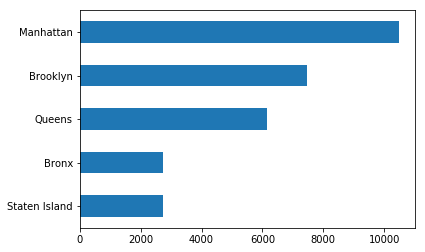

In [29]:
df_merged['borough'].value_counts().sort_values().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [30]:
df_population = pd.read_csv('/Users/alex/Desktop/Columbia/Foundations/class-06/06-classwork/dogs/boro_population.csv')

In [31]:
df_merged = df_merged.merge(df_population, left_on = 'borough', right_on = "borough", how = "outer")

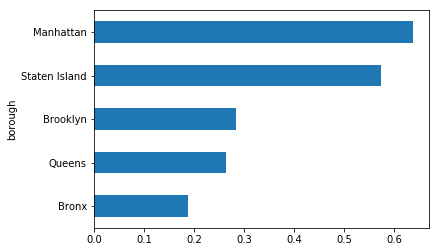

In [32]:
#alternative 1
df_merged.groupby('borough')\
    .apply(lambda x: x['population']\
    .count()/x['population']\
    .mean()*100)\
    .sort_values()\
    .plot(kind='barh')

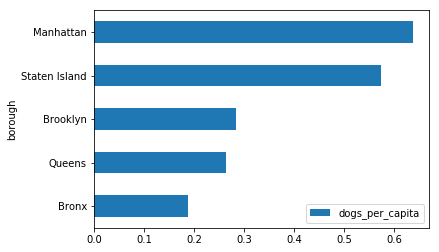

In [33]:
#alternative 2
df_borough_data = pd.DataFrame({'dogs_count' : df_merged.groupby( [ "borough", "population"] ).size()}).reset_index()
dogs_per_capita = df_borough_data['dogs_count'] / df_borough_data['population'] * 100
df_borough_data['dogs_per_capita'] = dogs_per_capita
df_borough_data.sort_values(by='dogs_per_capita').plot(kind="barh",x='borough',y='dogs_per_capita')

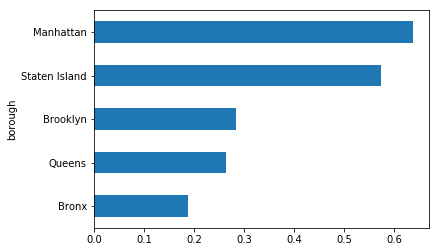

In [35]:
#alternative 3
(df_merged.groupby('borough')['population'].count()\
 /df_merged.groupby('borough')['population'].mean()*100)\
 .sort_values().plot(kind="barh")

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

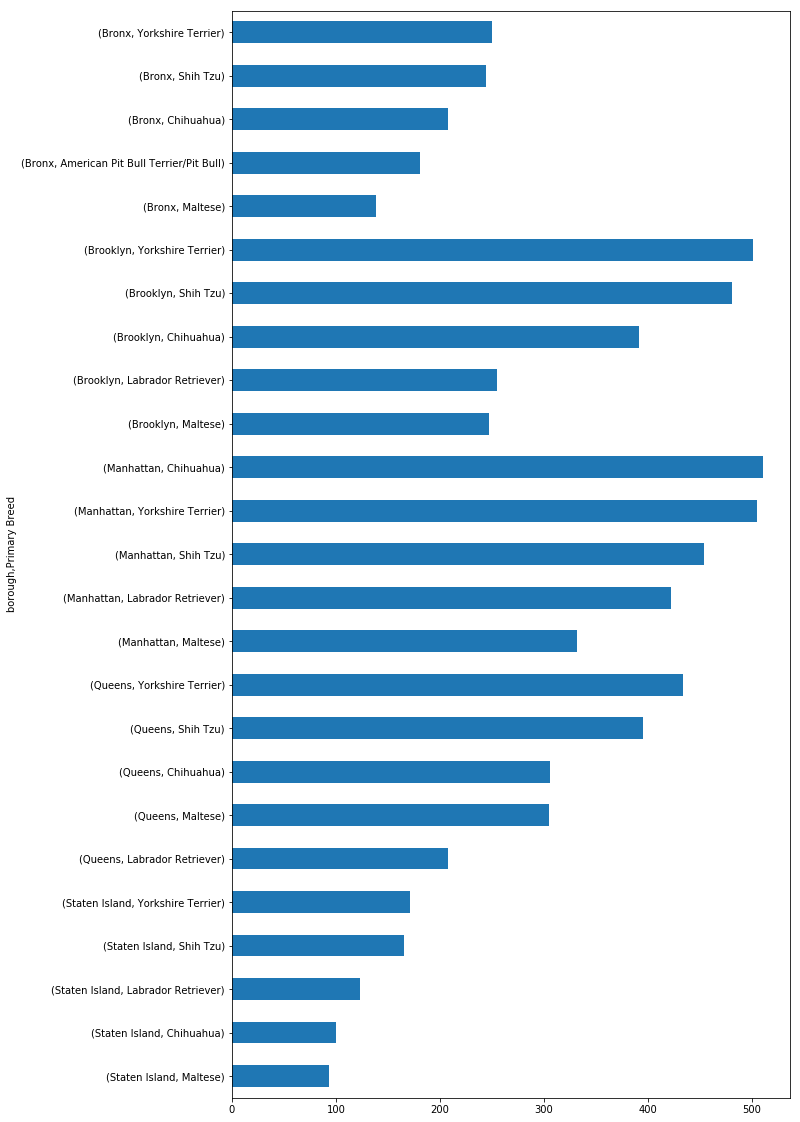

In [53]:
df_merged[df_merged['Primary Breed']!='Unknown']\
.groupby('borough')['Primary Breed'].value_counts().groupby(level=0)\
.head(5).plot(kind='barh',figsize=(10,20)).invert_yaxis()

## What percentage of dogs are not guard dogs?

In [39]:
perc_not_guard = df_merged["Guard or Trained"][df_merged["Guard or Trained"]=="No"].value_counts()/len(df_merged["Guard or Trained"])*100
print(round(float(perc_not_guard.astype(float)),2),"per cent of dogs are not guard dogs.")

99.93 per cent of dogs are not guard dogs.
